In [2]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('./test_images/Roja.png')
img.shape

(525, 475, 3)

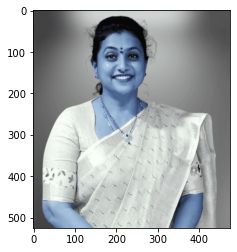

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(525, 475)

In [6]:
gray

array([[ 66,  66,  66, ...,  82,  82,  82],
       [ 82,  66,  82, ...,  82,  82,  82],
       [ 66,  66,  66, ...,  82,  82,  82],
       ...,
       [ 66,  66,  82, ..., 138, 138, 138],
       [ 66,  82,  66, ..., 138, 138, 127],
       [ 66,  82,  66, ..., 138, 138, 138]], dtype=uint8)

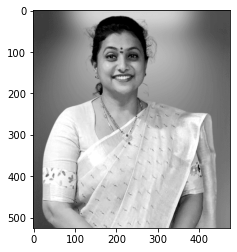

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[141,  54, 144, 144]], dtype=int32)

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(141, 54, 144, 144)

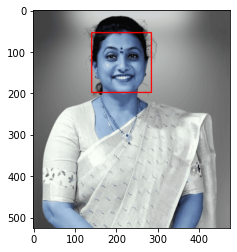

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

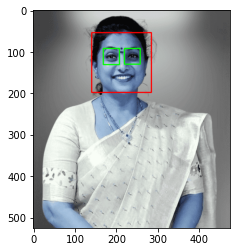

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

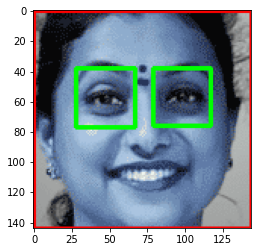

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
cropped_img = np.array(roi_color)
cropped_img.shape

(144, 144, 3)

In [14]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

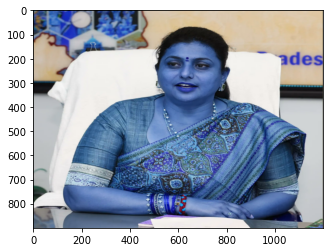

In [15]:
original_image = cv2.imread('./test_images/Roja1.png')
plt.imshow(original_image)

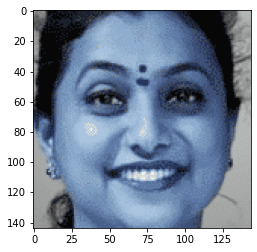

In [16]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Roja.png')
plt.imshow(cropped_image)

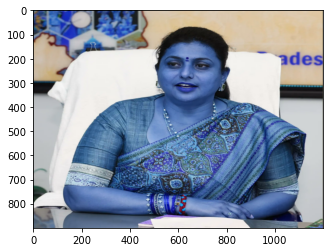

In [17]:
org_image_obstructed = cv2.imread('./test_images/Roja1.png')
plt.imshow(org_image_obstructed)

In [18]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/Roja1.png')
cropped_image_no_2_eyes

array([[[215, 196, 168],
        [215, 197, 168],
        [215, 197, 168],
        ...,
        [ 31,  29,  27],
        [ 31,  29,  28],
        [ 31,  29,  26]],

       [[215, 196, 168],
        [215, 197, 168],
        [215, 197, 168],
        ...,
        [ 27,  27,  24],
        [ 27,  27,  25],
        [ 27,  26,  25]],

       [[215, 196, 168],
        [215, 197, 168],
        [215, 197, 168],
        ...,
        [ 26,  26,  24],
        [ 26,  27,  25],
        [ 26,  26,  25]],

       ...,

       [[ 90, 131, 176],
        [ 84, 125, 170],
        [ 77, 118, 163],
        ...,
        [ 77, 111, 171],
        [ 77, 110, 171],
        [ 77, 110, 172]],

       [[ 88, 129, 174],
        [ 83, 124, 169],
        [ 77, 118, 163],
        ...,
        [ 78, 112, 172],
        [ 78, 112, 173],
        [ 78, 112, 174]],

       [[ 85, 127, 171],
        [ 81, 122, 167],
        [ 77, 118, 163],
        ...,
        [ 80, 113, 176],
        [ 79, 113, 175],
        [ 79, 113, 175]]

In [19]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [22]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [23]:
img_dirs

['./dataset/cropped',
 './dataset/gudivada_amarnath',
 './dataset/chelluboina_venu_gopala_krishna',
 './dataset/ushashri_charan',
 './dataset/kakani_govardhan_reddy',
 './dataset/budi_mutyala_naidu',
 './dataset/botsa_satyanarayana',
 './dataset/kottu_satyanarayana',
 './dataset/jogi_ramesh',
 './dataset/dadisetti_ramalingeswara_rao',
 './dataset/jagan_mohan',
 './dataset/pinipe_viswarup',
 './dataset/merugu_nagarjuna',
 './dataset/seediri_appalaraju',
 './dataset/dharmana_prasada_rao',
 './dataset/karumuri_venkata_nageswara_rao',
 './dataset/peedika_rajanna_dora',
 './dataset/amzath_basha_shaik_bepari',
 './dataset/vidala_rajini',
 './dataset/buggana_rajendranath_reddy',
 './dataset/gummanur_jayaram',
 './dataset/roja',
 './dataset/peddireddy_ramachanra_reddy',
 './dataset/taneti_vanita',
 './dataset/narayana_swamy',
 './dataset/audimulapu_suresh']

In [24]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [25]:

cropped_image_dirs = []
elect_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    elect_name = img_dir.split('/')[-1]
    elect_file_names_dict[elect_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + elect_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = elect_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            
            cv2.imwrite(cropped_file_path, roi_color)
            elect_file_names_dict[elect_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/cropped/gudivada_amarnath
Generating cropped images in folder:  ./dataset/cropped/chelluboina_venu_gopala_krishna
Generating cropped images in folder:  ./dataset/cropped/ushashri_charan
Generating cropped images in folder:  ./dataset/cropped/kakani_govardhan_reddy
Generating cropped images in folder:  ./dataset/cropped/budi_mutyala_naidu
Generating cropped images in folder:  ./dataset/cropped/botsa_satyanarayana
Generating cropped images in folder:  ./dataset/cropped/kottu_satyanarayana
Generating cropped images in folder:  ./dataset/cropped/jogi_ramesh
Generating cropped images in folder:  ./dataset/cropped/dadisetti_ramalingeswara_rao
Generating cropped images in folder:  ./dataset/cropped/jagan_mohan
Generating cropped images in folder:  ./dataset/cropped/pinipe_viswarup
Generating cropped images in folder:  ./dataset/cropped/merugu_nagarjuna
Generating cropped images in folder:  ./dataset/cropped/seediri_appalaraju


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


Generating cropped images in folder:  ./dataset/cropped/dharmana_prasada_rao
Generating cropped images in folder:  ./dataset/cropped/karumuri_venkata_nageswara_rao
Generating cropped images in folder:  ./dataset/cropped/peedika_rajanna_dora
Generating cropped images in folder:  ./dataset/cropped/amzath_basha_shaik_bepari
Generating cropped images in folder:  ./dataset/cropped/vidala_rajini
Generating cropped images in folder:  ./dataset/cropped/buggana_rajendranath_reddy
Generating cropped images in folder:  ./dataset/cropped/gummanur_jayaram
Generating cropped images in folder:  ./dataset/cropped/roja
Generating cropped images in folder:  ./dataset/cropped/peddireddy_ramachanra_reddy
Generating cropped images in folder:  ./dataset/cropped/taneti_vanita
Generating cropped images in folder:  ./dataset/cropped/narayana_swamy
Generating cropped images in folder:  ./dataset/cropped/audimulapu_suresh


In [26]:
elect_file_names_dict = {}
for img_dir in cropped_image_dirs:
    elect_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    elect_file_names_dict[elect_name] = file_list
elect_file_names_dict

{'gudivada_amarnath': ['./dataset/cropped/gudivada_amarnath/gudivada_amarnath13.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath15.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath2.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath25.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath18.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath22.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath29.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath42.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath23.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath20.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath26.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath36.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath17.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath3.jpg',
  './dataset/cropped/gudivada_amarnath/gudivada_amarnath31.jpg',
  './d

In [27]:
class_dict = {}
count = 0
for elect_name in elect_file_names_dict.keys():
    class_dict[elect_name] = count
    count = count + 1
class_dict

{'gudivada_amarnath': 0,
 'chelluboina_venu_gopala_krishna': 1,
 'ushashri_charan': 2,
 'kakani_govardhan_reddy': 3,
 'budi_mutyala_naidu': 4,
 'botsa_satyanarayana': 5,
 'kottu_satyanarayana': 6,
 'jogi_ramesh': 7,
 'dadisetti_ramalingeswara_rao': 8,
 'jagan_mohan': 9,
 'pinipe_viswarup': 10,
 'merugu_nagarjuna': 11,
 'seediri_appalaraju': 12,
 'dharmana_prasada_rao': 13,
 'karumuri_venkata_nageswara_rao': 14,
 'peedika_rajanna_dora': 15,
 'amzath_basha_shaik_bepari': 16,
 'vidala_rajini': 17,
 'buggana_rajendranath_reddy': 18,
 'gummanur_jayaram': 19,
 'roja': 20,
 'peddireddy_ramachanra_reddy': 21,
 'taneti_vanita': 22,
 'narayana_swamy': 23,
 'audimulapu_suresh': 24}

In [28]:
cropped_img = np.array(roi_color)
cropped_img.shape

(192, 192, 3)

In [29]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

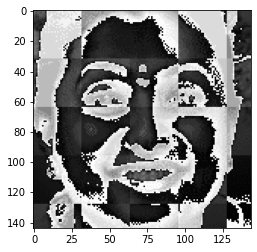

In [30]:
im_har = w2d(cropped_image ,'db1',5)
plt.imshow(im_har, cmap='gray')

In [31]:
X, y = [], []
for elect_name, training_files in elect_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[elect_name])     

In [32]:
len(X[0])

4096

In [33]:
X[0]

array([[ 50],
       [ 51],
       [ 49],
       ...,
       [ 14],
       [ 14],
       [138]], dtype=uint8)

In [34]:
y[0]

0

In [35]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(671, 4096)

In [36]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.625

In [38]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.00      0.00      0.00         4
           2       0.80      0.67      0.73         6
           3       0.57      0.50      0.53         8
           4       1.00      1.00      1.00         1
           5       0.29      0.40      0.33         5
           6       0.00      0.00      0.00         4
           7       0.56      0.90      0.69        10
           8       0.00      0.00      0.00         1
           9       0.50      0.73      0.59        11
          10       1.00      0.80      0.89         5
          11       0.67      0.50      0.57         8
          12       1.00      0.71      0.83         7
          13       0.44      0.57      0.50         7
          14       0.00      0.00      0.00         0
          15       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         3
          17       0.56    

/home/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/student/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/student/anaconda3/lib/python3.

In [39]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [40]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
} 

In [48]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.739679,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.402173,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.716259,{'logisticregression__C': 1}


In [49]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [50]:
best_estimators['svm'].score(X_test,y_test)

0.743801652892562

In [51]:
best_estimators['random_forest'].score(X_test,y_test)

0.38016528925619836

In [52]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.731404958677686

In [53]:
best_clf = best_estimators['svm']

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[13,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  1,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  8,  0,  0,  0,  1,  0,  0,  0,  1,  0,
         0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0, 14,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  1],
       [ 1,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0, 

Text(69.0, 0.5, 'Truth')

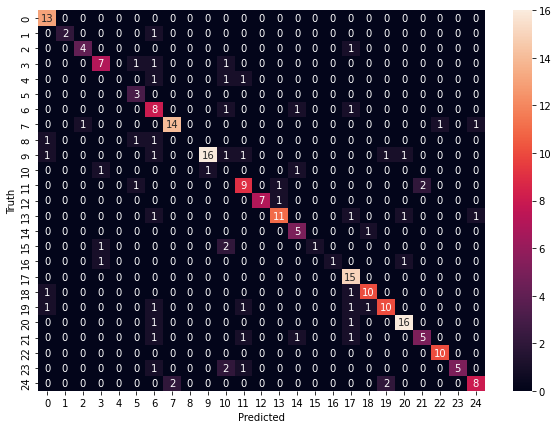

In [55]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [56]:
class_dict

{'gudivada_amarnath': 0,
 'chelluboina_venu_gopala_krishna': 1,
 'ushashri_charan': 2,
 'kakani_govardhan_reddy': 3,
 'budi_mutyala_naidu': 4,
 'botsa_satyanarayana': 5,
 'kottu_satyanarayana': 6,
 'jogi_ramesh': 7,
 'dadisetti_ramalingeswara_rao': 8,
 'jagan_mohan': 9,
 'pinipe_viswarup': 10,
 'merugu_nagarjuna': 11,
 'seediri_appalaraju': 12,
 'dharmana_prasada_rao': 13,
 'karumuri_venkata_nageswara_rao': 14,
 'peedika_rajanna_dora': 15,
 'amzath_basha_shaik_bepari': 16,
 'vidala_rajini': 17,
 'buggana_rajendranath_reddy': 18,
 'gummanur_jayaram': 19,
 'roja': 20,
 'peddireddy_ramachanra_reddy': 21,
 'taneti_vanita': 22,
 'narayana_swamy': 23,
 'audimulapu_suresh': 24}

In [57]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [58]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [1]:
pip install Flask


Note: you may need to restart the kernel to use updated packages.
